In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
df_csv = pd.read_csv('../Data/diabetes.csv')

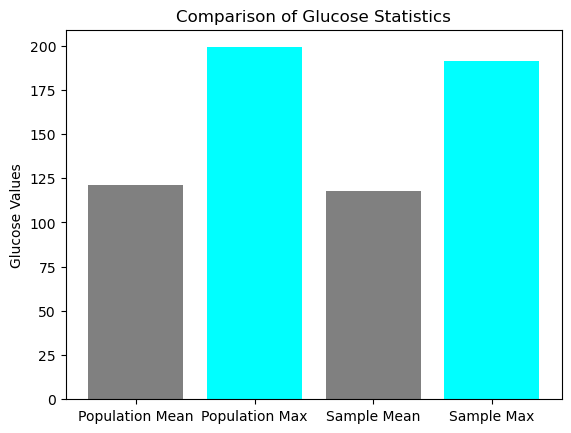

In [17]:
# 1
np.random.seed(310)
sample = df_csv.sample(25)
population_mean_glucose = df_csv['Glucose'].mean()
population_max_glucose = df_csv['Glucose'].max()
sample_mean_glucose = sample['Glucose'].mean()
sample_max_glucose = sample['Glucose'].max()
labels = ['Population Mean', 'Population Max', 'Sample Mean', 'Sample Max']
values = [population_mean_glucose, population_max_glucose, sample_mean_glucose, sample_max_glucose]
plt.bar(labels, values, color=['gray', 'cyan', 'gray', 'cyan'])
plt.title('Comparison of Glucose Statistics')
plt.ylabel('Glucose Values')
plt.show()

The mean and maximum of the population are higher than those of the sample.

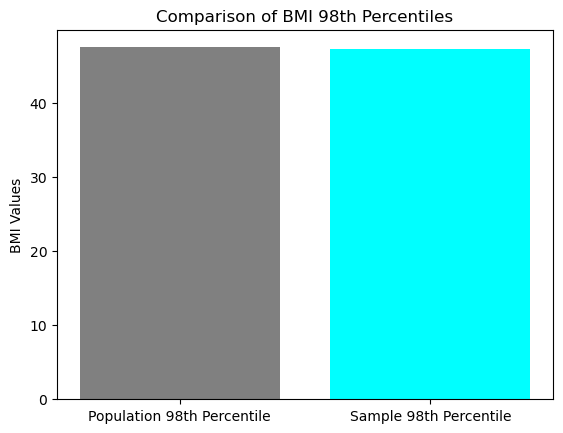

In [18]:
# 2
population_percentile = np.percentile(df_csv['BMI'], 98)
sample_percentile = np.percentile(sample['BMI'], 98)
labels = ['Population 98th Percentile', 'Sample 98th Percentile']
values = [population_percentile, sample_percentile]
plt.bar(labels, values, color=['gray', 'cyan'])
plt.title('Comparison of BMI 98th Percentiles')
plt.ylabel('BMI Values')
plt.show()

There is a difference between the sample and population percentiles, as I have noticed.

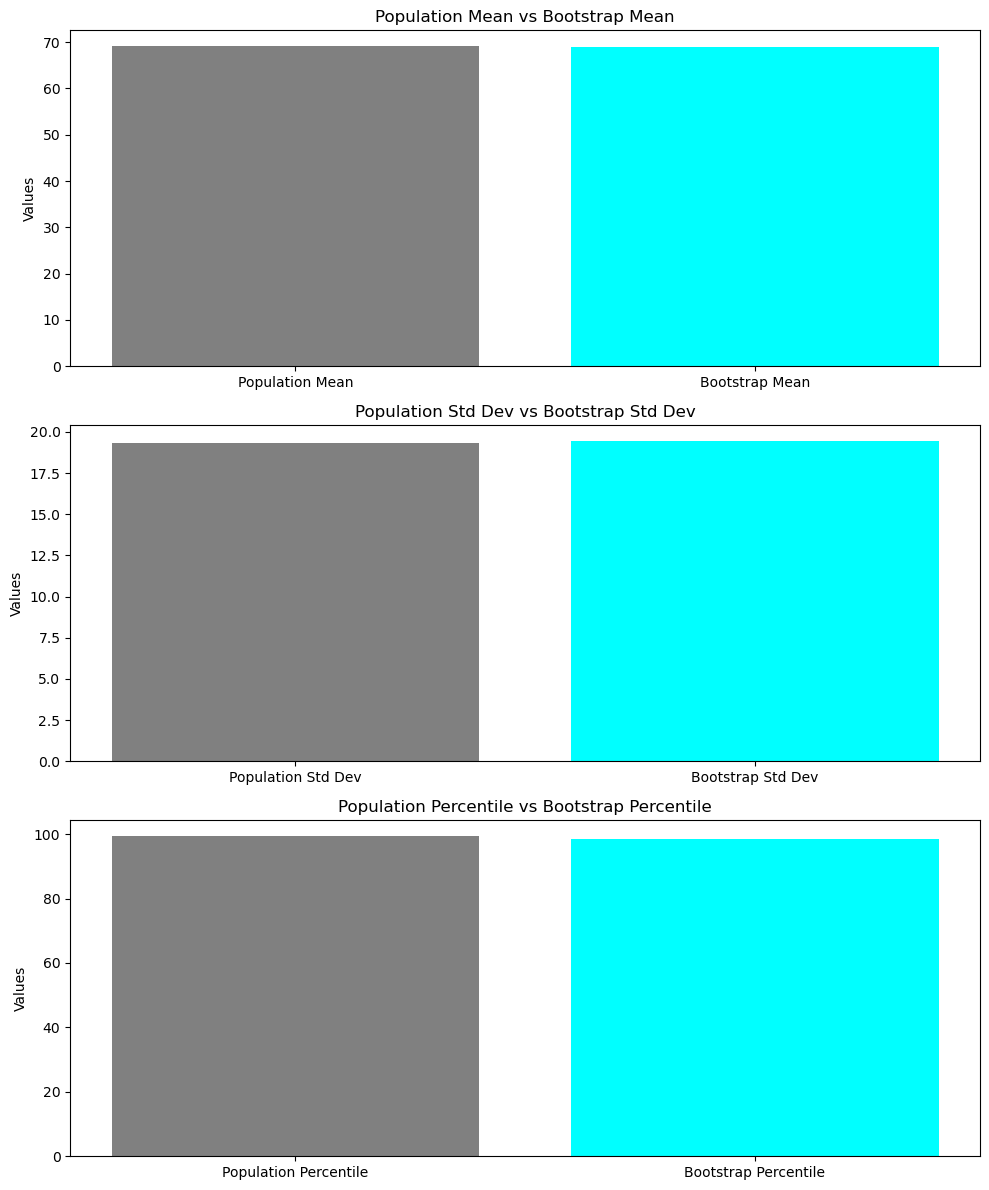

In [19]:
# 3
bootstrap_samples = 500
sample_size = 150
bootstrap_means = np.zeros(bootstrap_samples)
bootstrap_std_devs = np.zeros(bootstrap_samples)
bootstrap_percentiles = np.zeros(bootstrap_samples)
for i in range(bootstrap_samples):
    bootstrap_sample = df_csv['BloodPressure'].sample(sample_size, replace=True)
    bootstrap_means[i] = bootstrap_sample.mean()
    bootstrap_std_devs[i] = bootstrap_sample.std()
    bootstrap_percentiles[i] = np.percentile(bootstrap_sample, 98)
population_mean = df_csv['BloodPressure'].mean()
population_std_dev = df_csv['BloodPressure'].std()
population_percentile = np.percentile(df_csv['BloodPressure'], 98) 
bmean=np.mean(bootstrap_means)
bsd=np.mean(bootstrap_std_devs)
bp=np.mean(bootstrap_percentiles)
fig, axs = plt.subplots(3, 1, figsize=(10, 12))
axs[0].bar(['Population Mean', 'Bootstrap Mean'], [population_mean, bmean], color=['gray', 'cyan'])
axs[0].set_ylabel('Values')
axs[0].set_title('Population Mean vs Bootstrap Mean')
axs[1].bar(['Population Std Dev', 'Bootstrap Std Dev'], [population_std_dev, bsd], color=['gray', 'cyan'])
axs[1].set_ylabel('Values')
axs[1].set_title('Population Std Dev vs Bootstrap Std Dev')
axs[2].bar(['Population Percentile', 'Bootstrap Percentile'], [population_percentile, bp], color=['gray', 'cyan'])
axs[2].set_ylabel('Values')
axs[2].set_title('Population Percentile vs Bootstrap Percentile')
plt.tight_layout()
plt.show()

The differences between bootstrap and population statistics are not very great.